In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
data = pd.read_csv("data.csv")

In [30]:
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [31]:
X = data.iloc[:, 2:]  # Features (columns 3-32)
y = data['diagnosis']  # Target variable (M=malignant, B=benign)



In [32]:
data = data.dropna(subset=['diagnosis'])
X = data.iloc[:, 2:]
y = data['diagnosis'].map({'M': 1, 'B': 0})


In [33]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = classifier.predict(X_test)


In [38]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [39]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9649122807017544
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



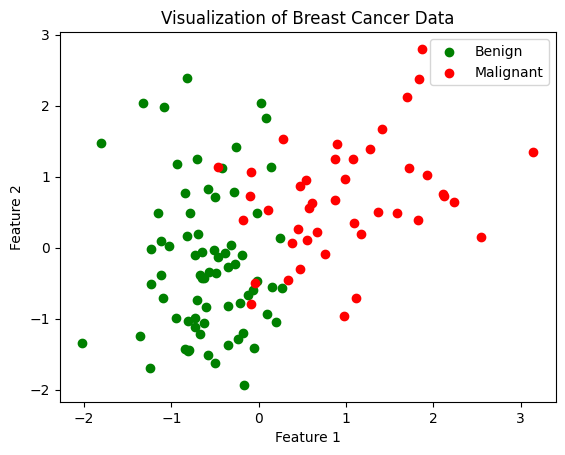

In [40]:


import matplotlib.pyplot as plt


plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c="green", label="Benign")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c="red", label="Malignant")


plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of Breast Cancer Data")


plt.legend()


plt.show()


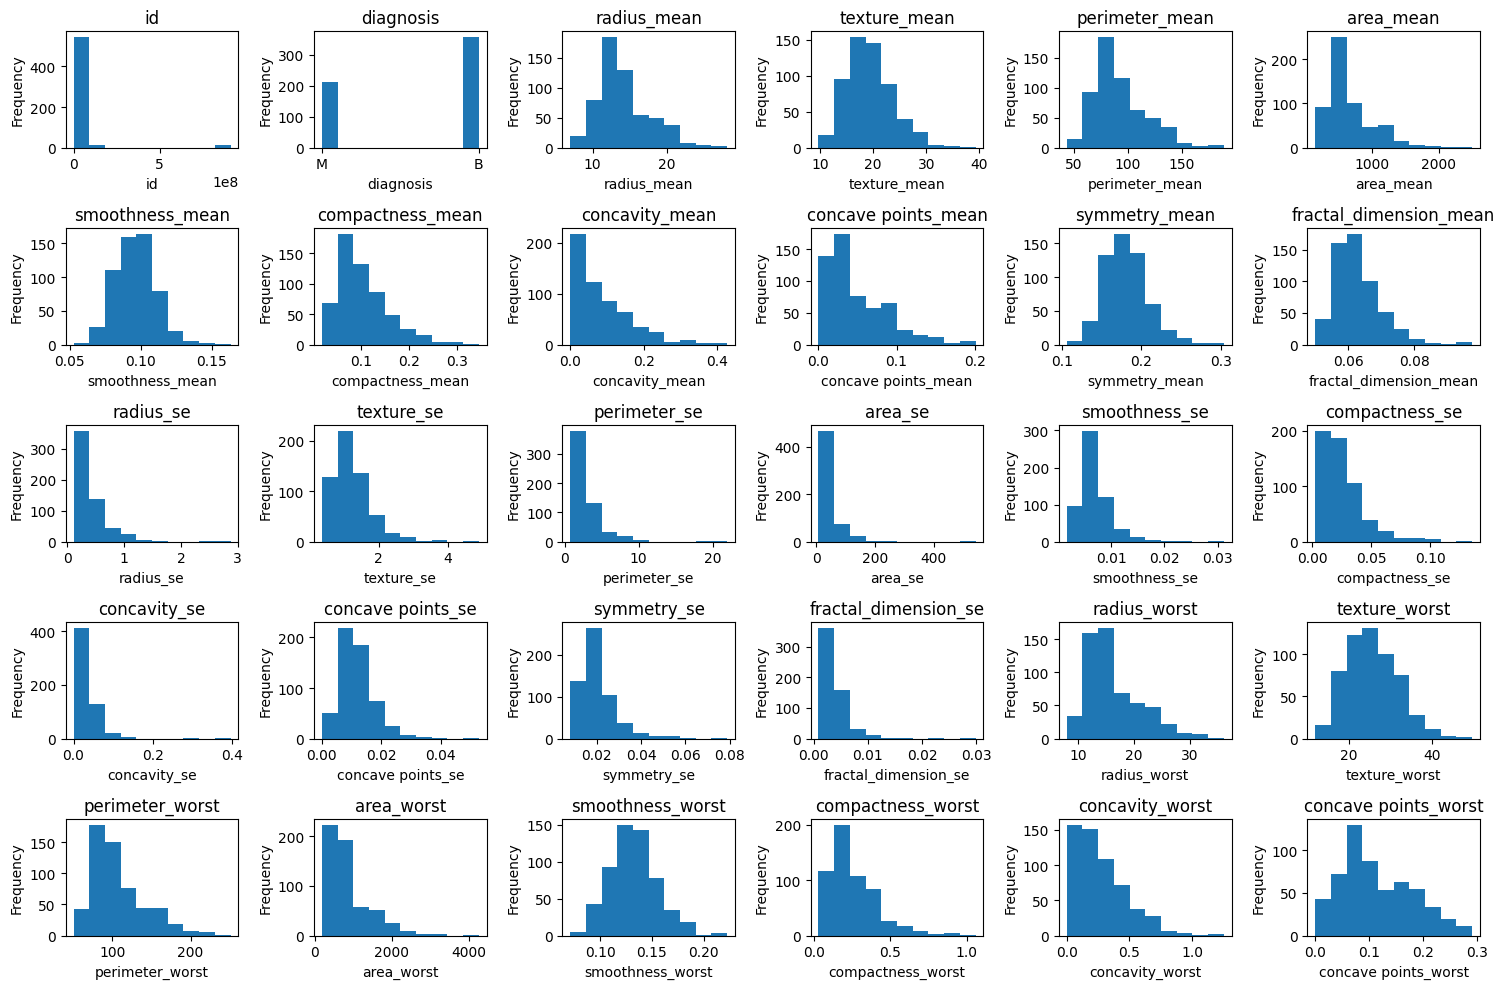

In [47]:
# prompt: visualize the data of every column using histogram show in small size

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    ax.hist(data.iloc[:, i])
    ax.set_title(data.columns[i])
    ax.set_xlabel(data.columns[i])
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()


<ipython-input-44-765f87573c35>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.iloc[:, 1:11].corr()


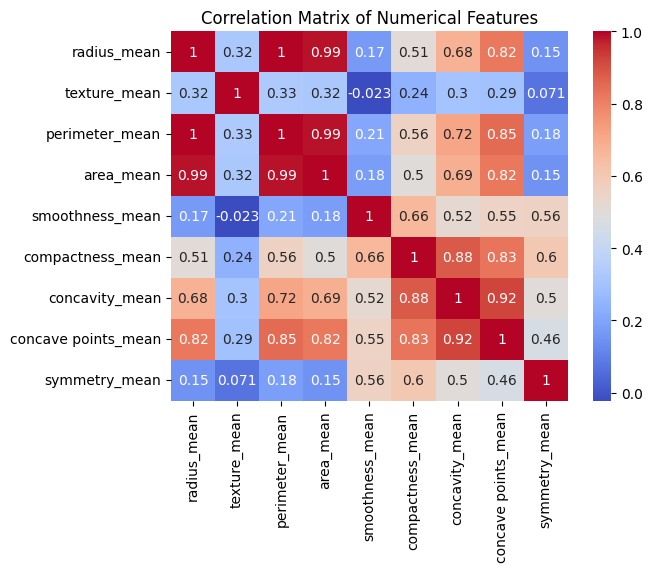

In [44]:
# prompt: correlation_matrix = data.iloc[:, 1:11].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()
# adjust the given code in this project

import seaborn as sns

correlation_matrix = data.iloc[:, 1:11].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


<ipython-input-46-7427a976f8e2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], color='g', shade=True)
<ipython-input-46-7427a976f8e2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], color='g', shade=True)
<ipython-input-46-7427a976f8e2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], color='g', shade=True)
<ipython-input-46-7427a976f8e2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], color='g', shade=True)
<ipython-input-46-7427a976f8e2>:

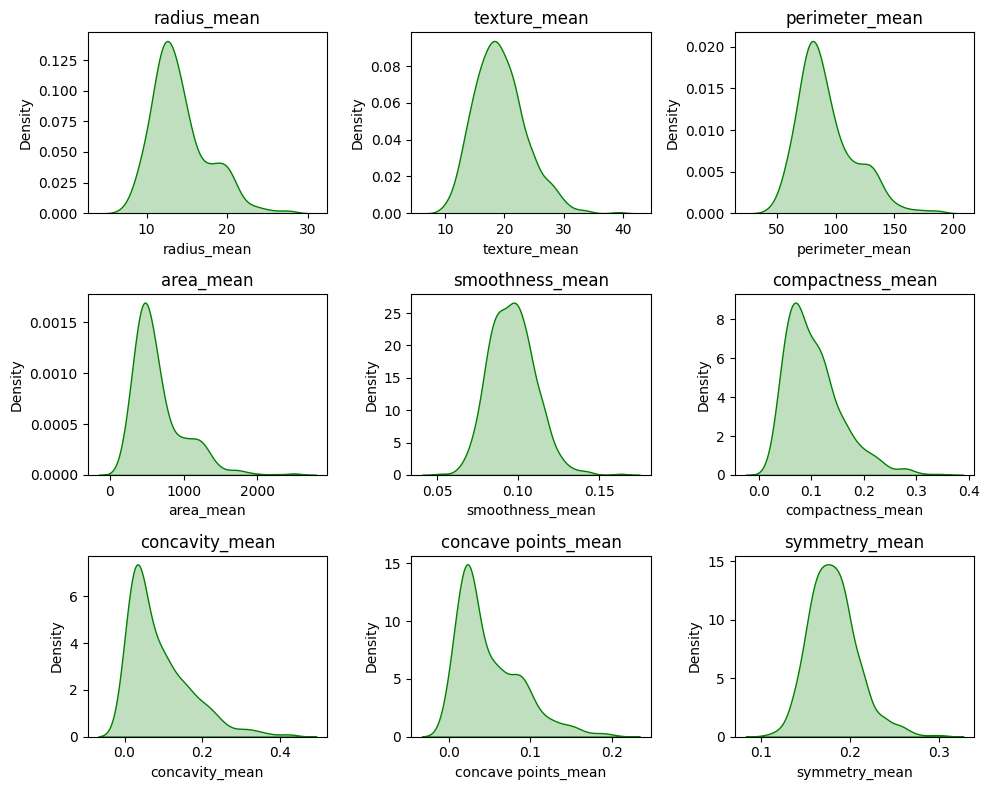

In [46]:
# prompt: show the density plot in small size

plt.figure(figsize=(10, 8))
for i, column in enumerate(data.columns[2:11]):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data[column], color='g', shade=True)
    plt.title(column)
plt.tight_layout()
plt.show()
